# EDA to explore data relationships

## Source Data:

https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/ 

SAMPLE DATA: HR Employee Attrition and Performance
avatar McKinley Stacker IV  Sep 14, 2015  91925
Watson Analytics Sample Data

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

## The goal of this exercise

As a new data scientist in a R&D technology company, your executive analytics committee has tasked you to find the driving factors of attrition in the organization. You are planning on doing the following:

1. Get a basic understanding of the dataset by performing EDA (Exploratory Data Analysis)

2. Deeper EDA with bivariate statistics to better understand drivers of attrition

3. Develop basic initial business rules and ideas that give insight to why there is turnover

# Install packages

This may be necesarry to run the first time

In [ ]:
!pip install pandas
!pip install pandas_profiling
!pip install seaborn
!pip install matplotlib
!pip install numpy

# Import the data

## Then show the shape and sample the first few rows

In [92]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
rawData = pd.read_csv("https://raw.githubusercontent.com/jswortz/UIC_Clustering_Code_2019/master/data/WA_Fn-UseC_-HR-Employee-Attrition.csv")


print("Data Shape: {} rows x {} cols".format(len(rawData), len(rawData.columns)))
rawData.head()

Data Shape: 1470 rows x 35 cols


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

# Inspect the data, perform Exploratory Data Analysis (EDA)


## Pandas .describe() is used to get basic statistics

In [24]:
rawData.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel          ...           RelationshipSatisfaction  \
count  1470.000000          ...                        1470.000000   
mean      2.063946          ...                           2.712245   
std       1.106940          ...                           1.081209   
min       1.000000          ...                           1.000000   
25%       1.000000          ...                           2.000000   
50%       2.000000          ...                           3.000000   
75%       3.000000          ...                           4.000000   
max       5.000000          ...                           4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 26 columns]

# Pandas profiling provides a much more robust analysis with formatted HTML output

In [67]:
import pandas_profiling

pandas_profiling.ProfileReport(rawData, check_correlation=True)


# Drop columns that are correlated or univariate
# Create target columns

In [25]:
dropCols = ["EmployeeCount", "MonthlyIncome", "Over18", "StandardHours"]

rawData = rawData.drop(dropCols, axis=1) #axis = 1 indicates column space

#create binary target 0/1 left variable

rawData['target'] = rawData['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

rawData = rawData.drop('Attrition', axis = 1)

# Get Numeric Columns and Categorical Columns

In [32]:
target_cols = ['target']

num_cols = rawData._get_numeric_data().columns

num_cols = list(num_cols)
num_cols = list(set(num_cols) - set(target_cols))#remove target value
cat_cols = list(set(rawData.columns) - set(num_cols) - set(target_cols))

In [33]:
cat_cols

['EducationField',
 'BusinessTravel',
 'Department',
 'MaritalStatus',
 'Gender',
 'JobRole',
 'OverTime']

# Distribution Analysis

/Users/jwortz/anaconda3/envs/ThreeSix/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jwortz/anaconda3/envs/ThreeSix/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


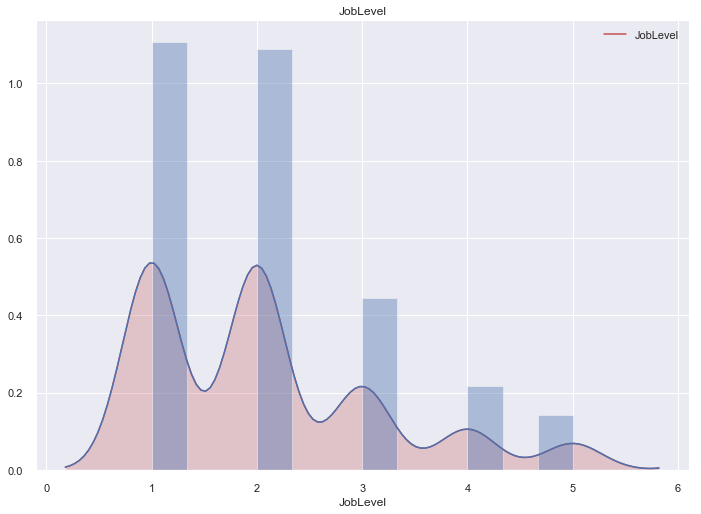

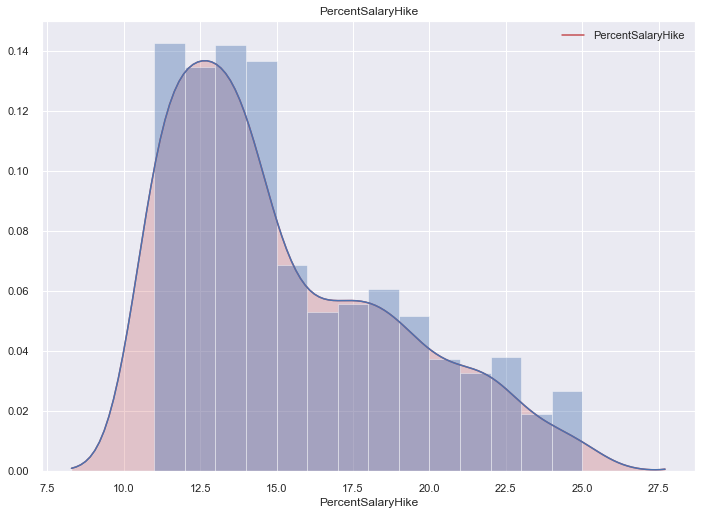

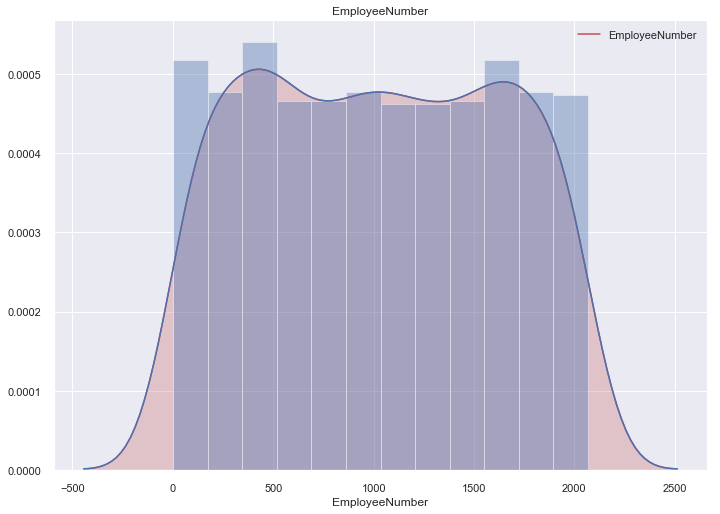

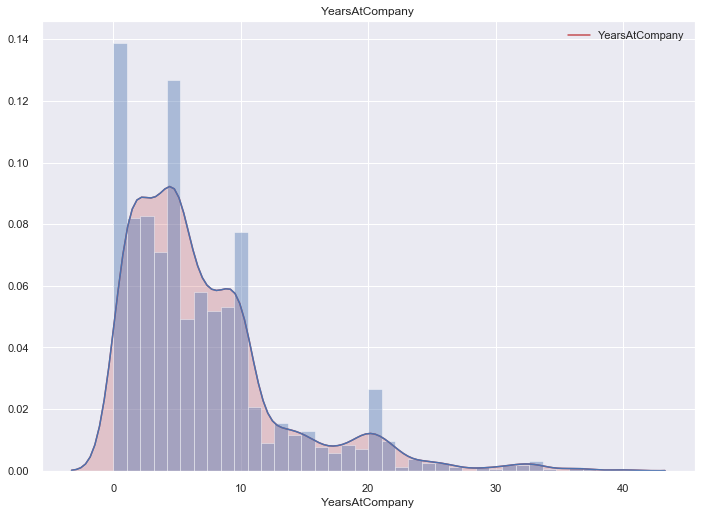

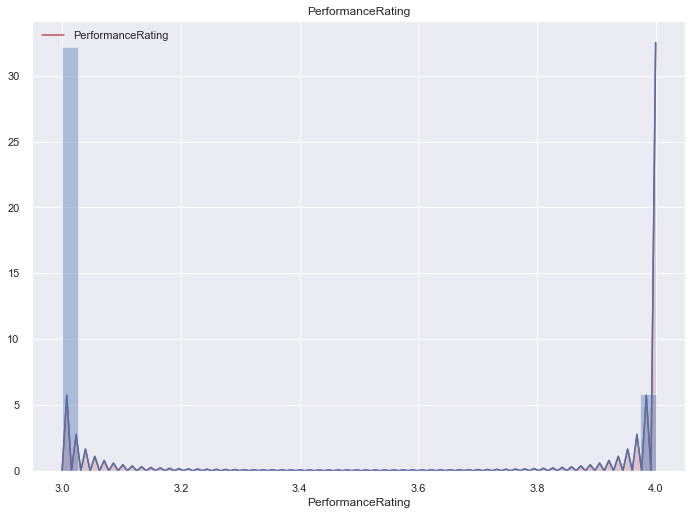

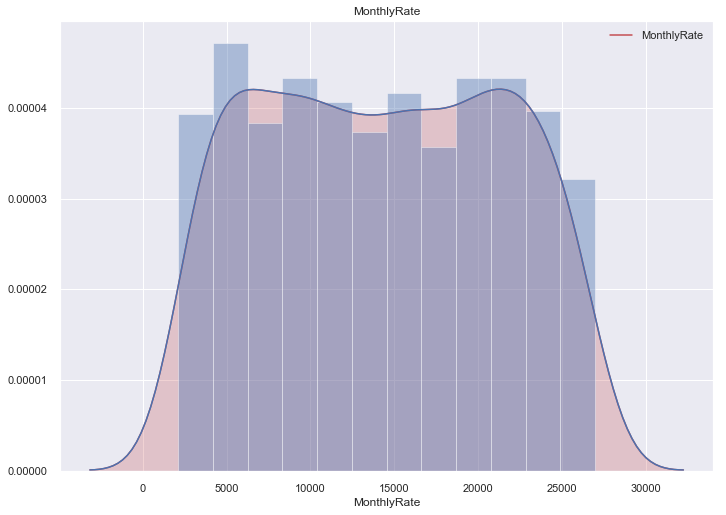

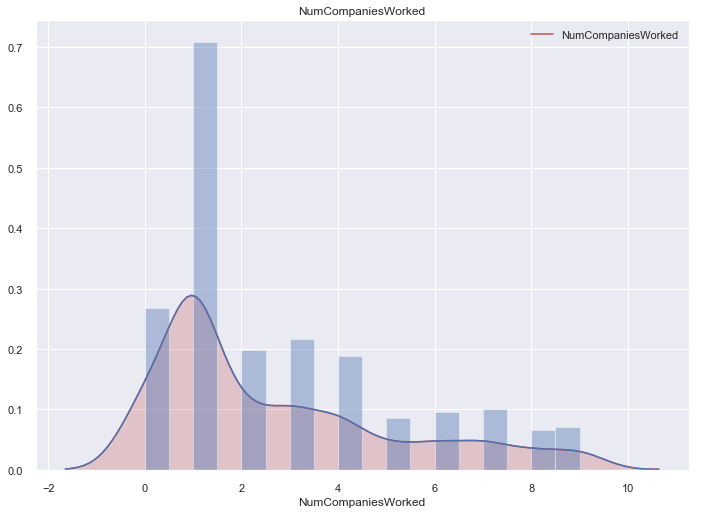

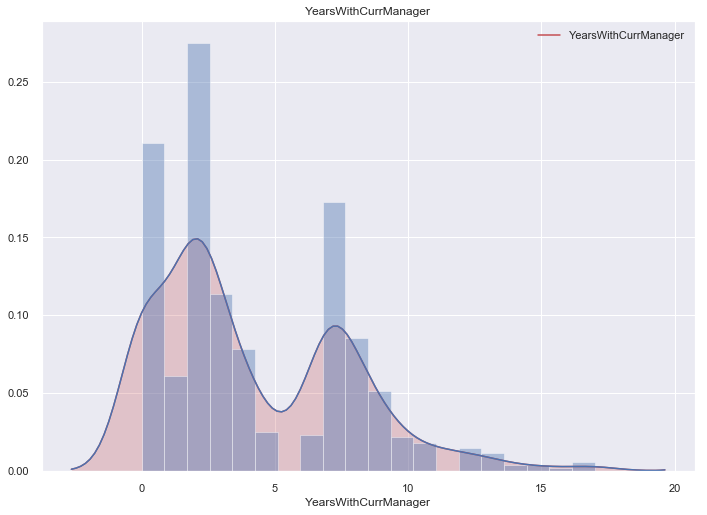

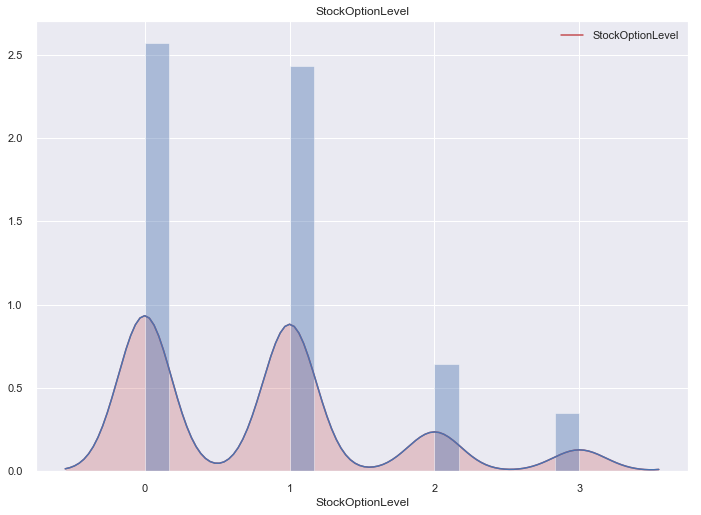

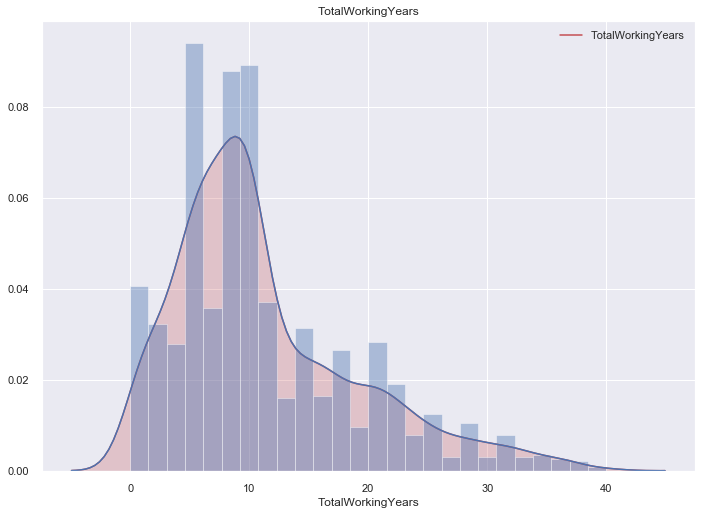

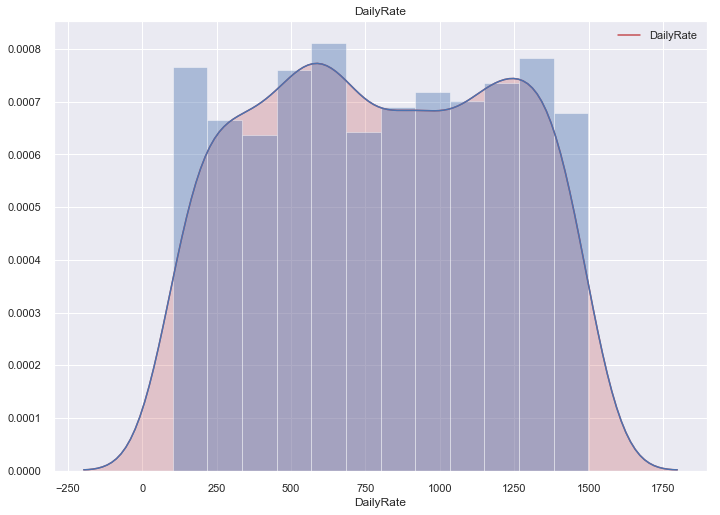

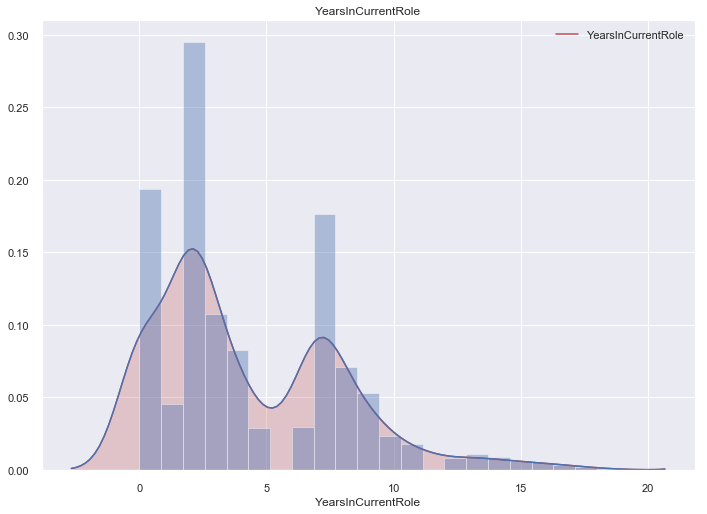

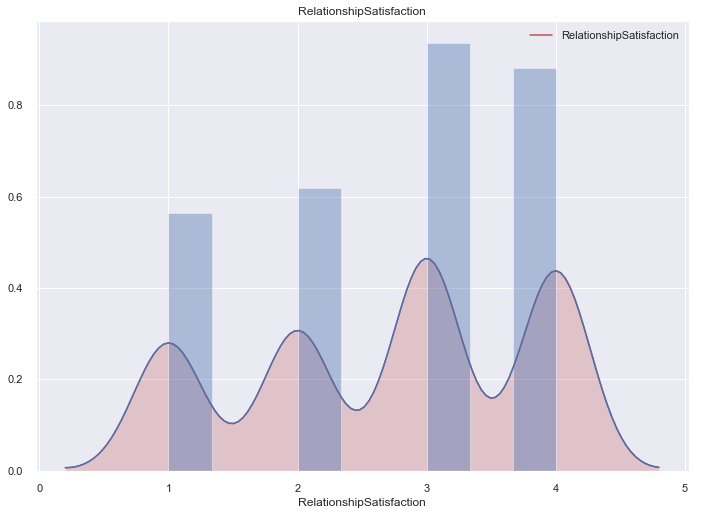

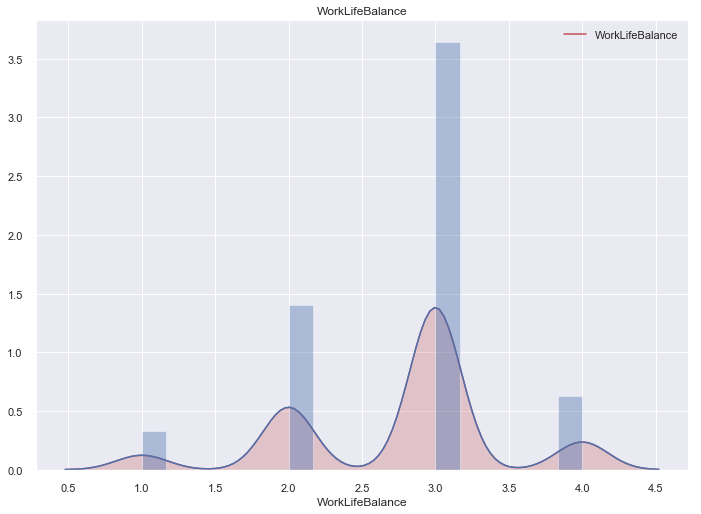

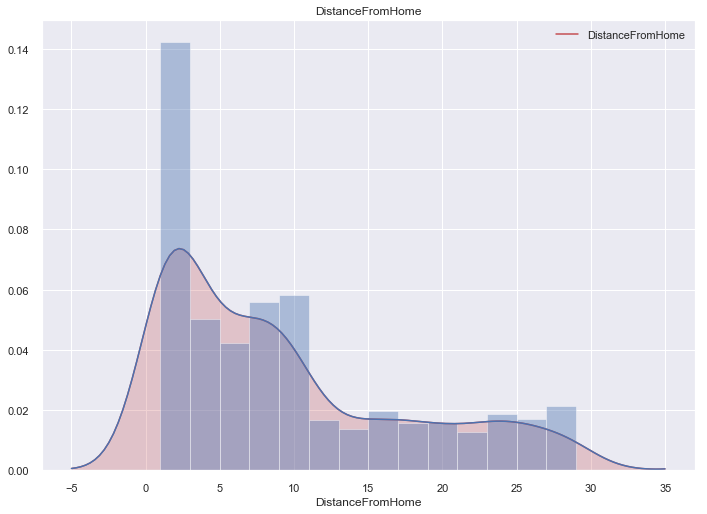

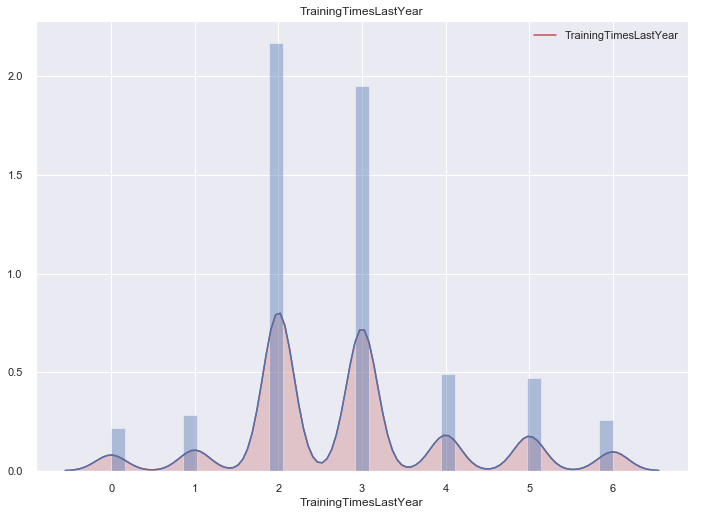

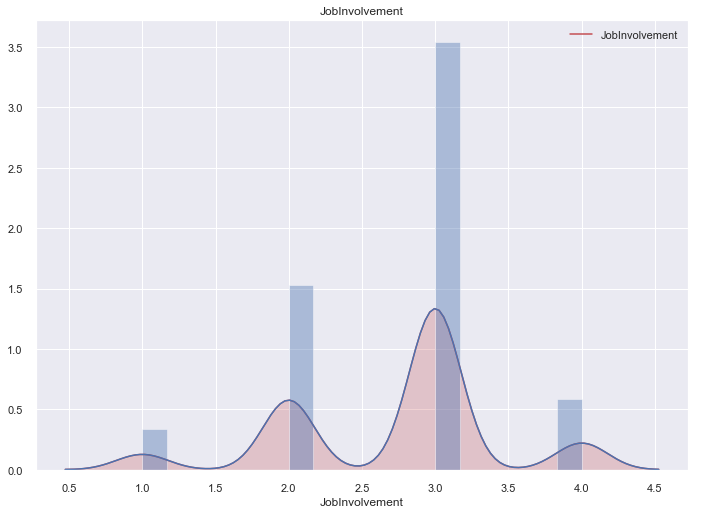

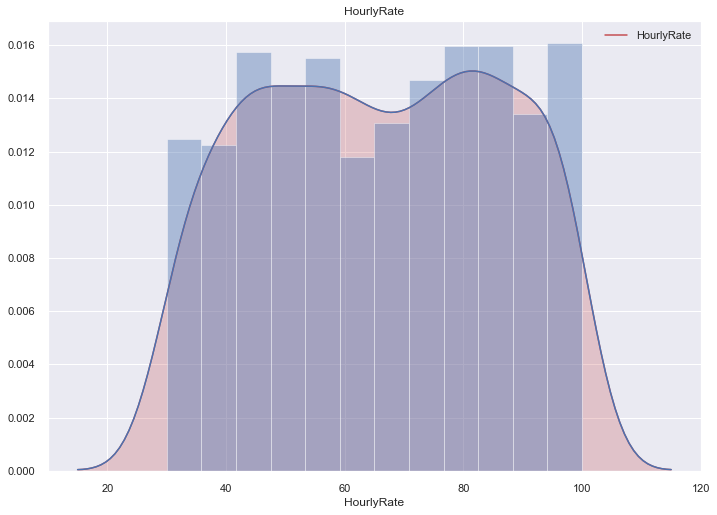

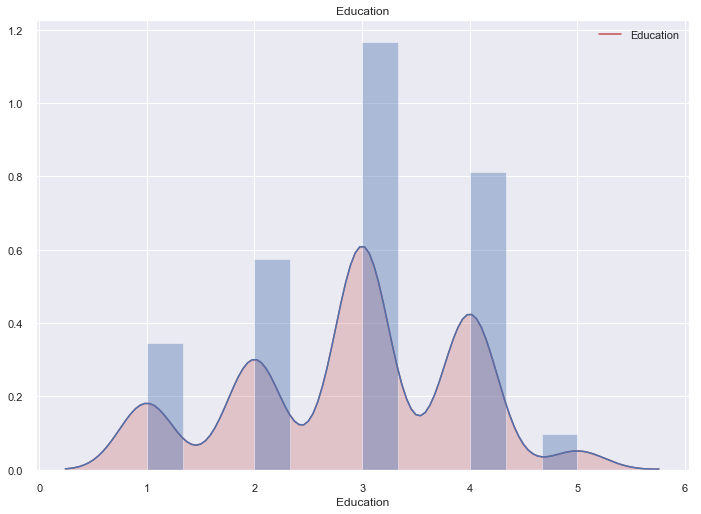

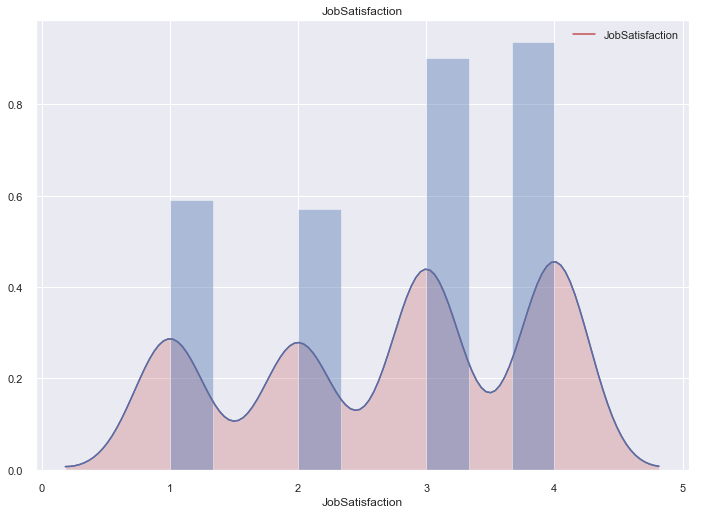

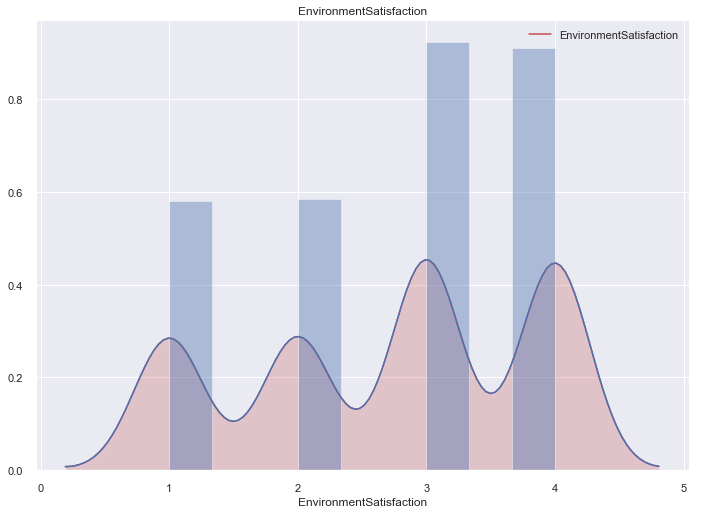

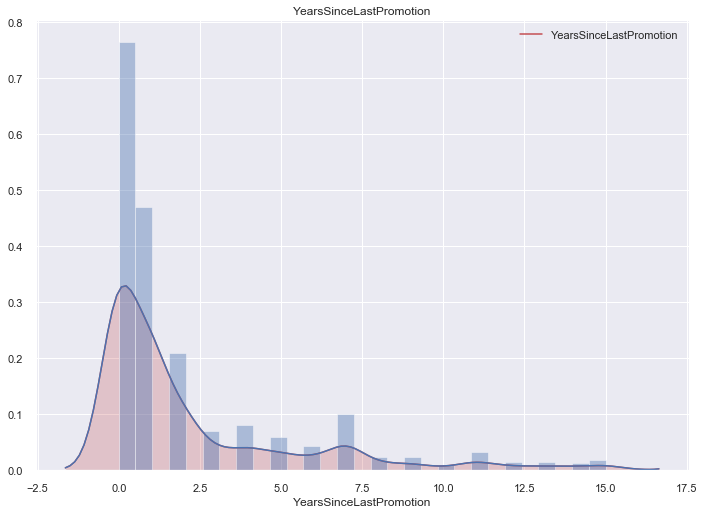

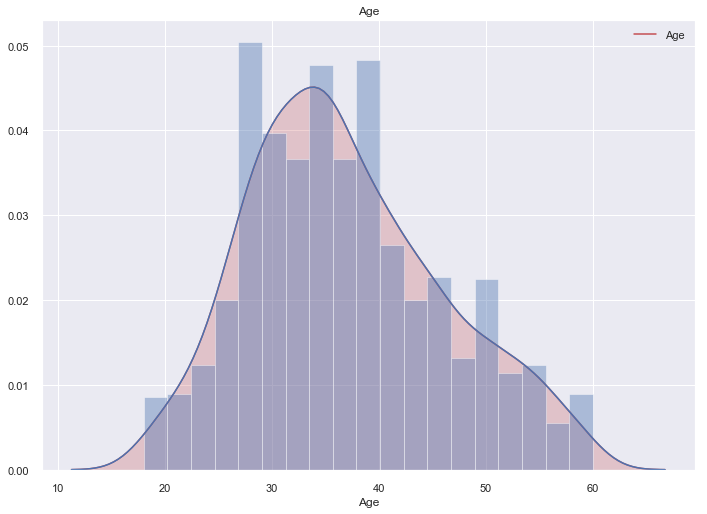

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline
for col in num_cols:
    x = rawData[col]
    plt.figure(col)
    try:
        ax = sns.kdeplot(x, shade=True, color="r").set_title(col)
        ax = sns.distplot(x)
    except Exception as e:
        print("didn't work for varaible: {}, {}".format(col, e))

# Correlation Analysis

/Users/jwortz/anaconda3/envs/ThreeSix/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jwortz/anaconda3/envs/ThreeSix/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jwortz/anaconda3/envs/ThreeSix/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/jwortz/anaconda3/envs/ThreeSix/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduc

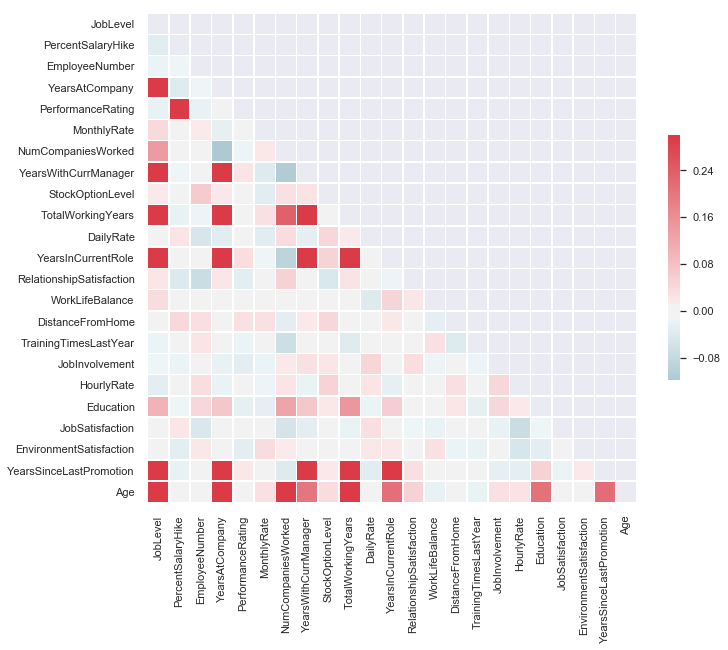

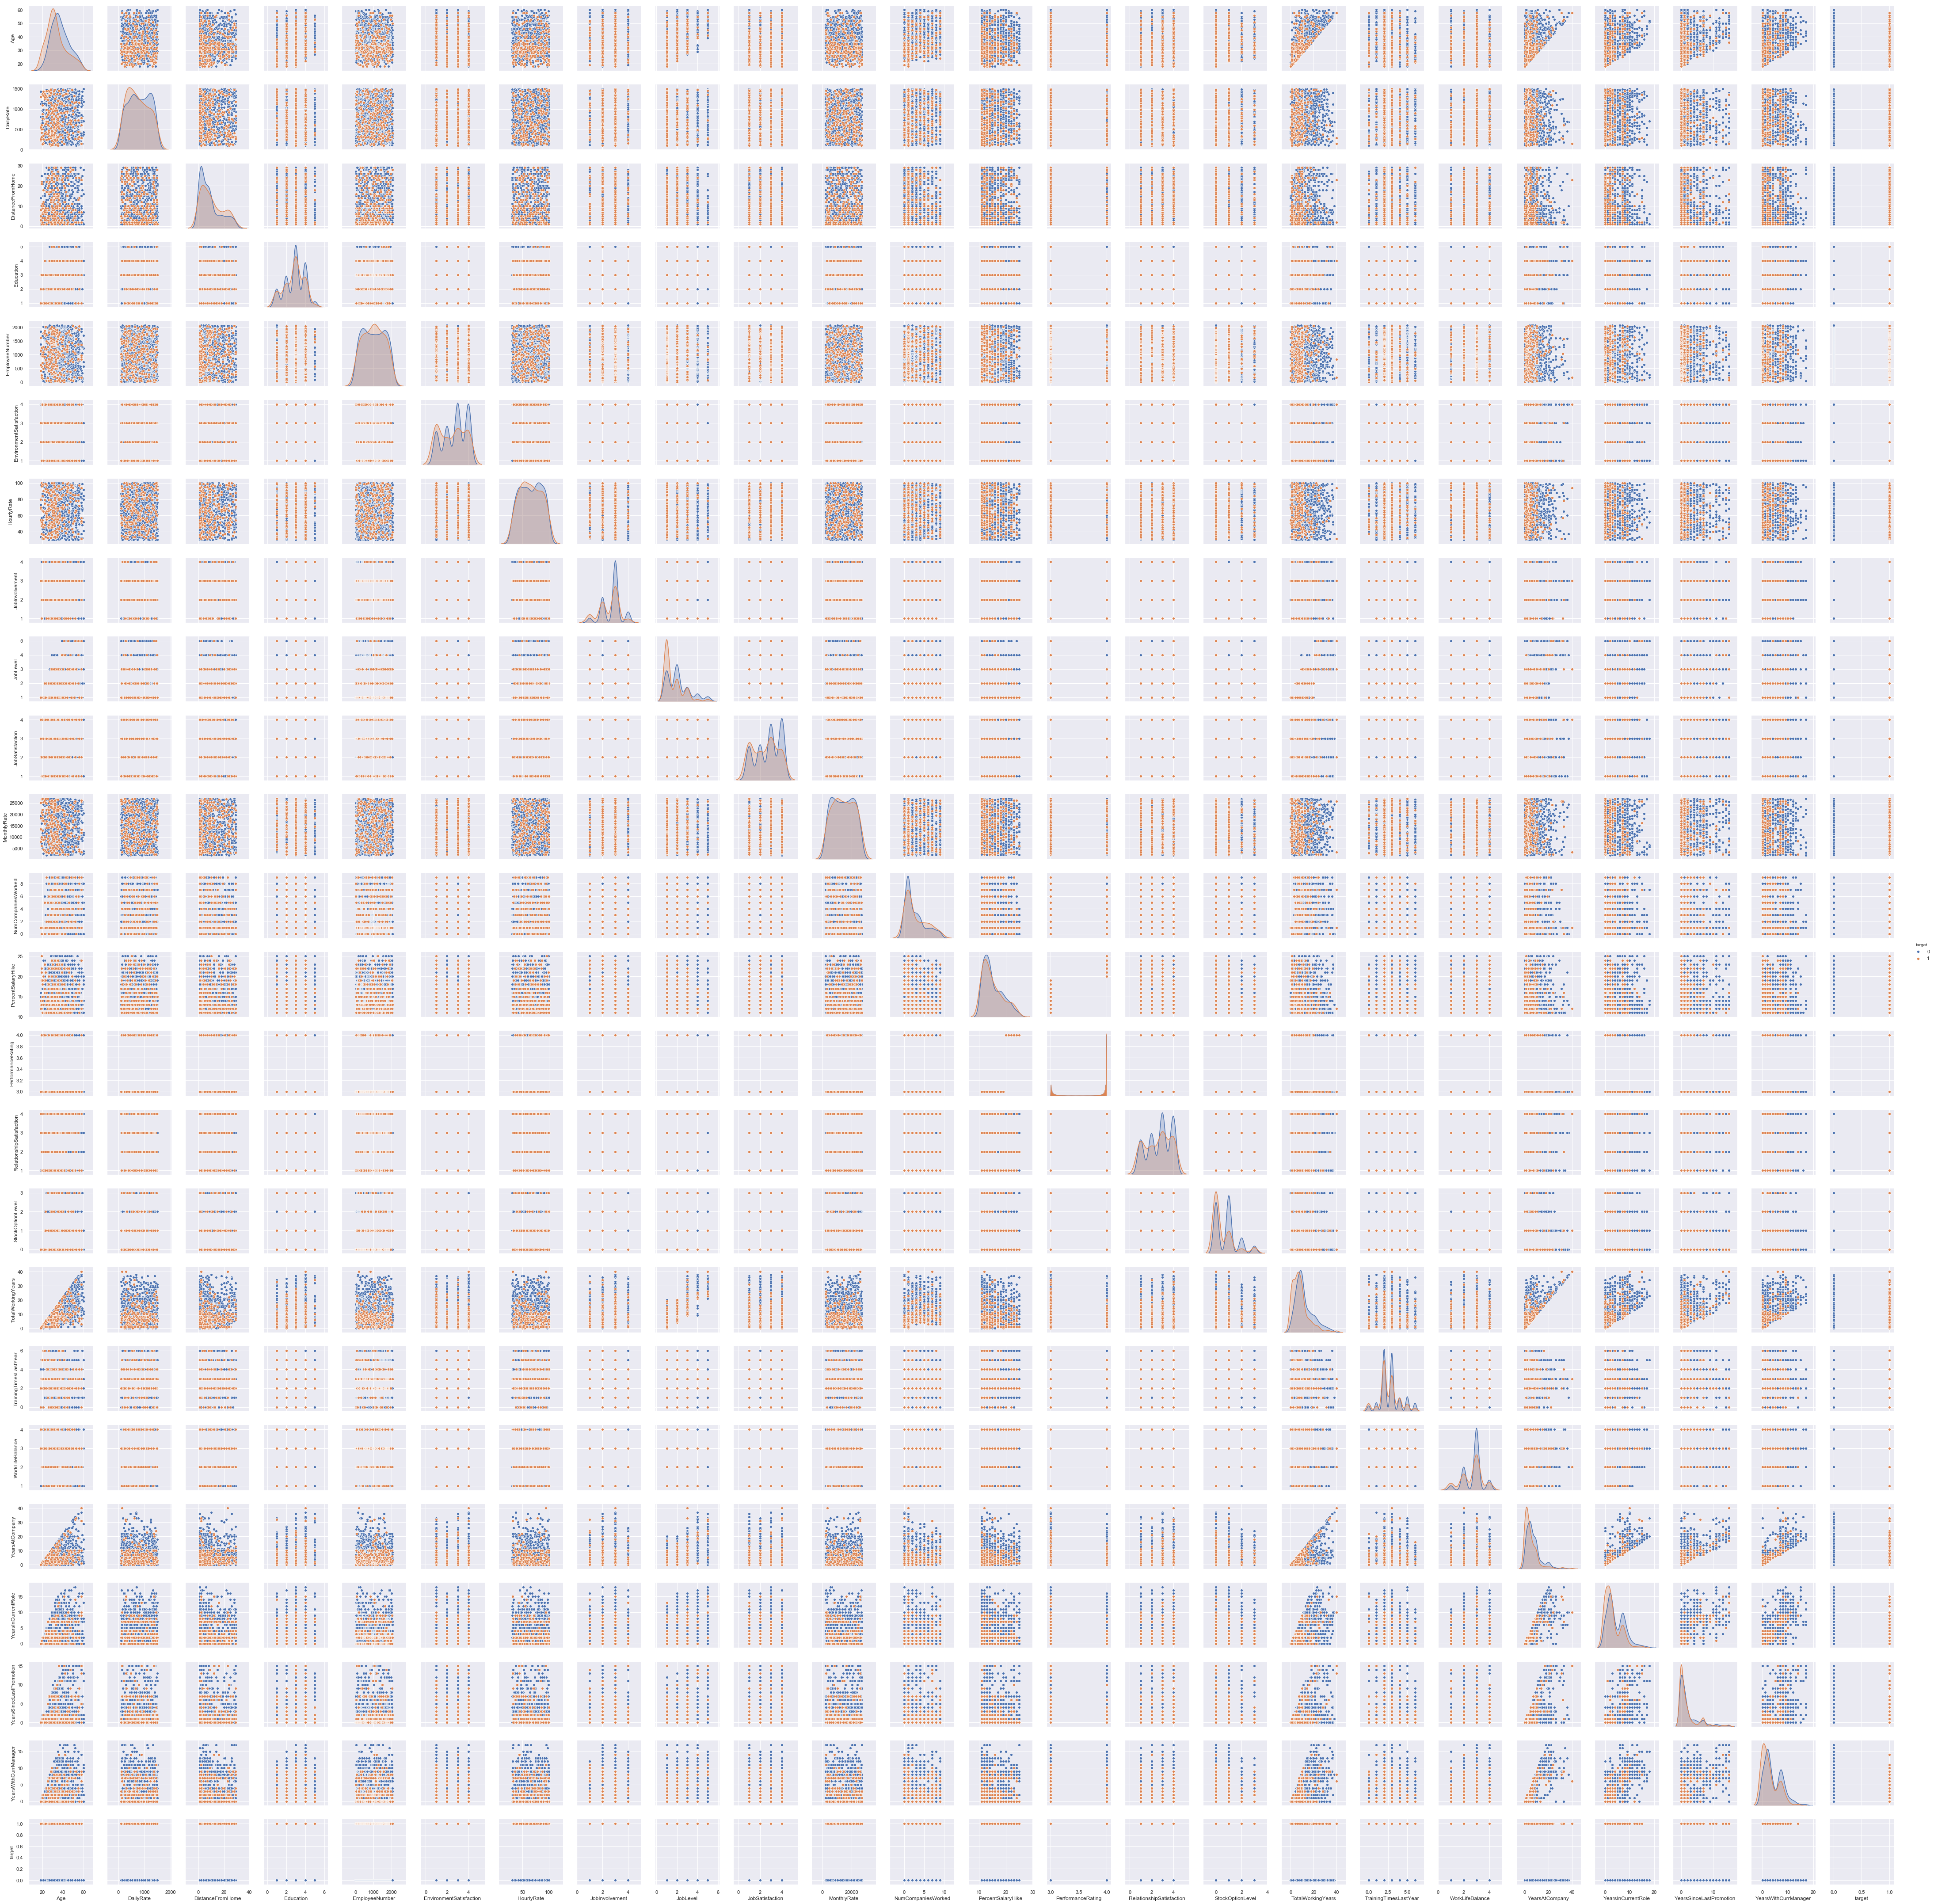

In [37]:
corr = rawData[num_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)


sns.pairplot(rawData, diag_kind='kde', hue = 'target') # target helps visualzie and gets into bivariate analysis
# remove hue if you just want univariate


# Function for bar line plot

In [65]:
def dualAxisSort(data1, data2, ascending=False):
    ix = data1.sort_values(ascending=ascending).index
    data1 = data1.reindex(ix)
    data2 = data2.reindex(ix)
    return data1, data2

def barLinePlot(data, col, title):
    try:
        region_cnt = data.groupby(col)['target'].count()
        region_avg = data.groupby(col)['target'].mean()
        region_avg = region_avg.loc[list(region_cnt.index)]     
        region_cnt, region_avg = dualAxisSort(region_cnt, region_avg)

        ax = sns.barplot(x=region_avg.index, y=region_cnt, data=data, color = 'b')
        ax.set_xticklabels(rotation=90, labels = region_avg.index)
        ax2 = ax.twinx()
        ax2 = sns.lineplot(x=region_cnt.index, y = region_avg, data=data, color='r').set_title(title)
        plt.figure()
        
        
    except Exception as e:
        print(e, col)
        pass
    

 # Bivariate for Categorical Variables

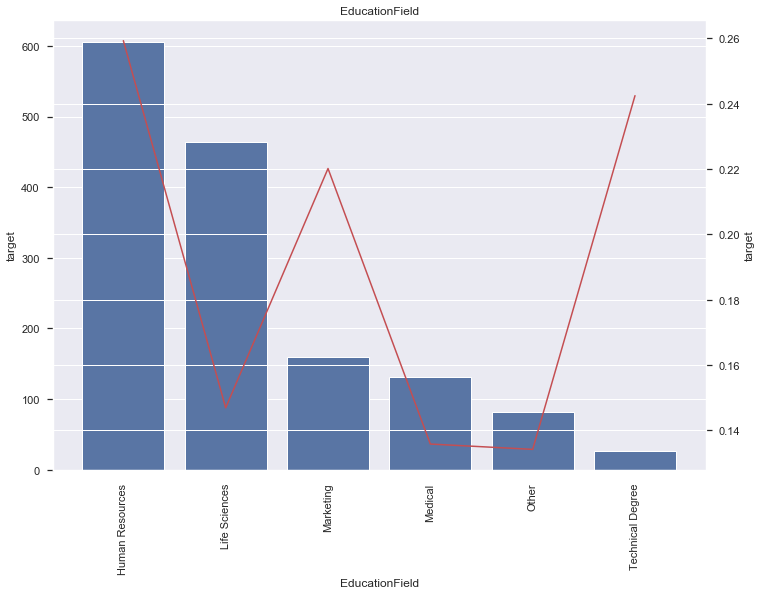

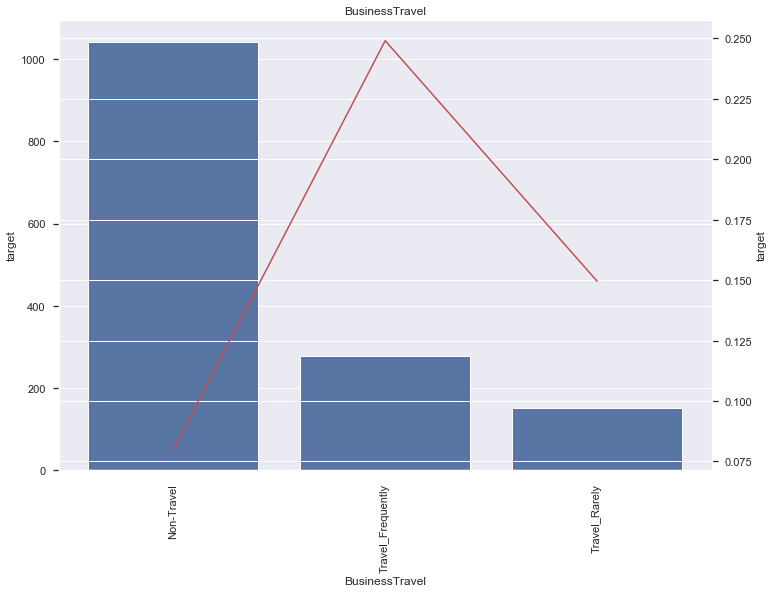

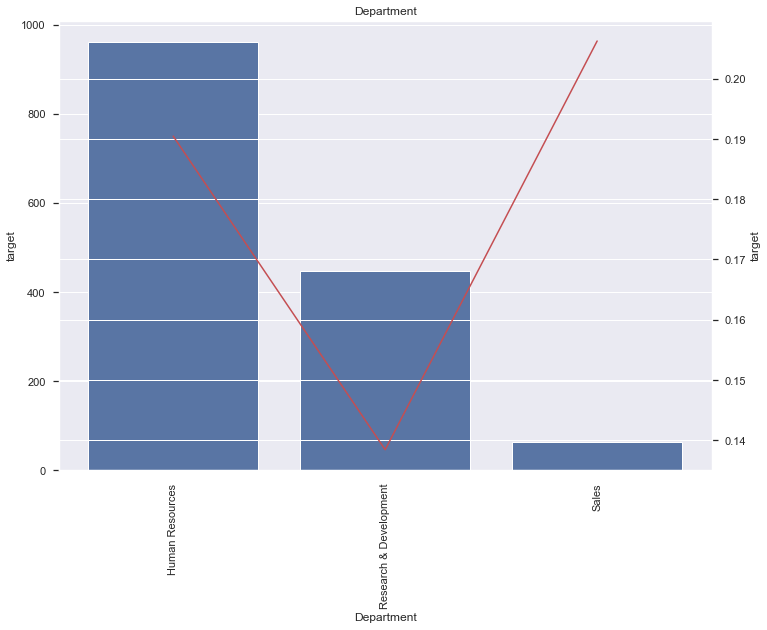

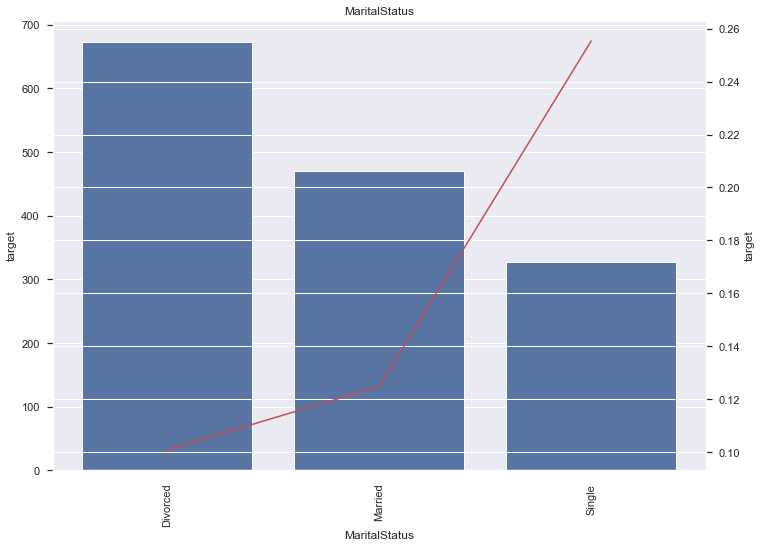

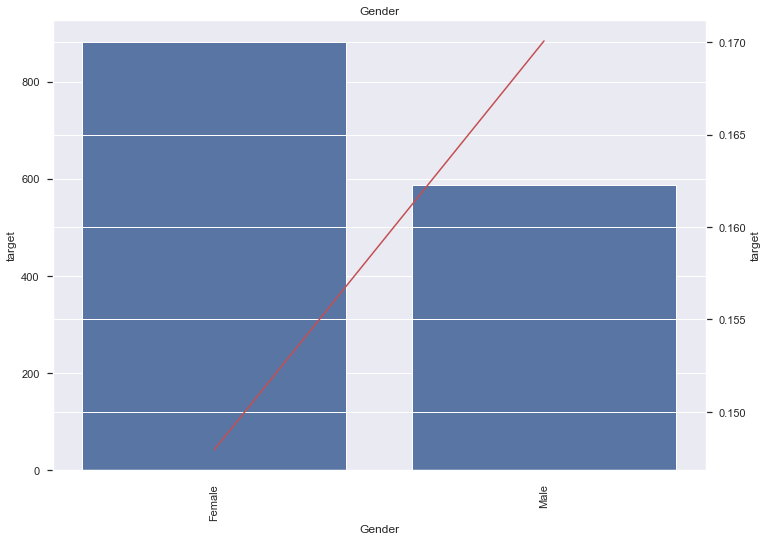

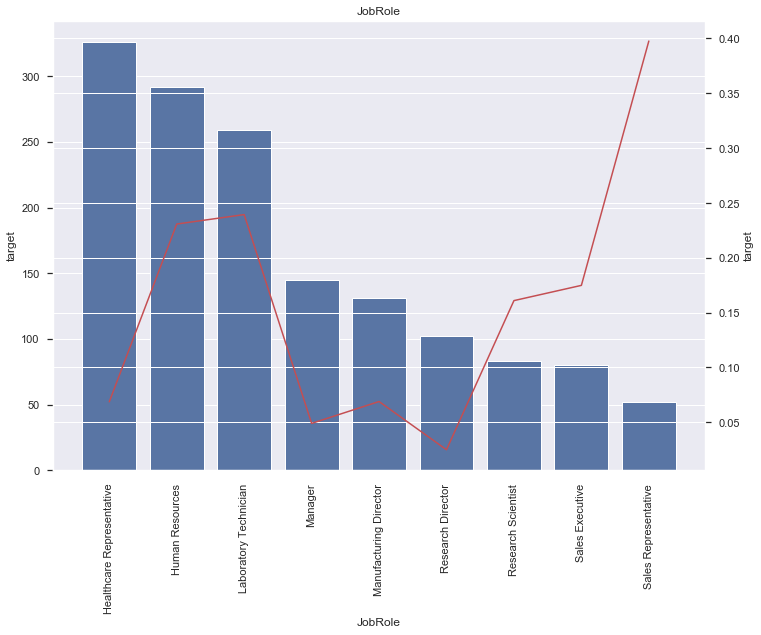

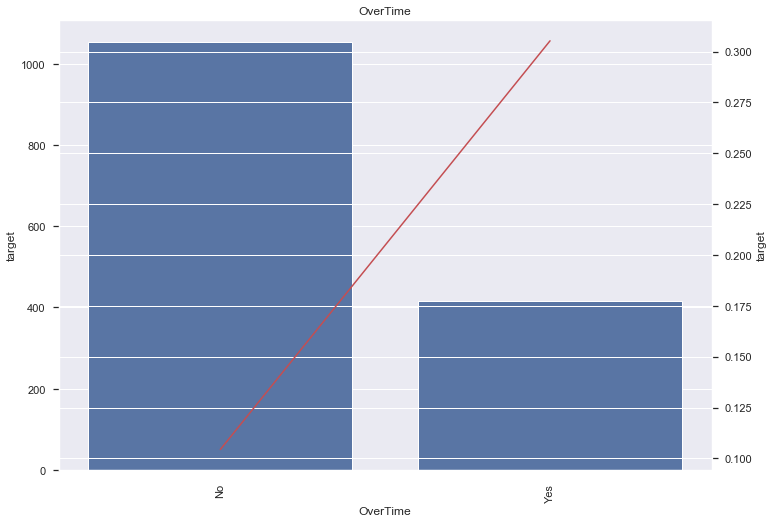

<Figure size 842.4x595.44 with 0 Axes>

In [66]:

for x in cat_cols:
    barLinePlot(rawData, x, x) 

# Distribution Bivariate Plots

/Users/jwortz/anaconda3/envs/ThreeSix/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jwortz/anaconda3/envs/ThreeSix/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


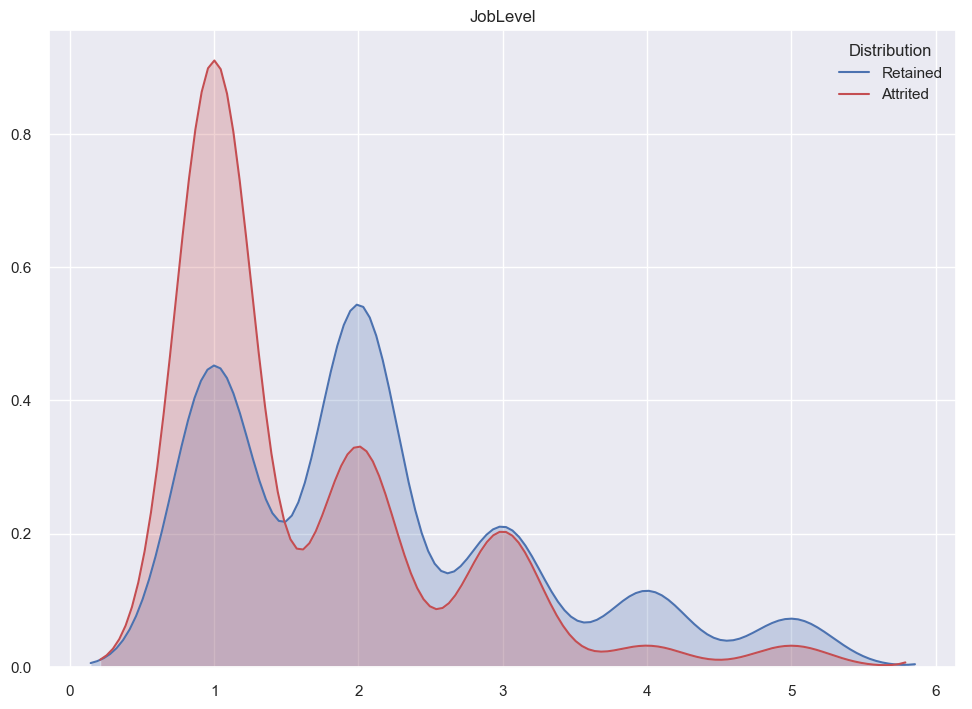

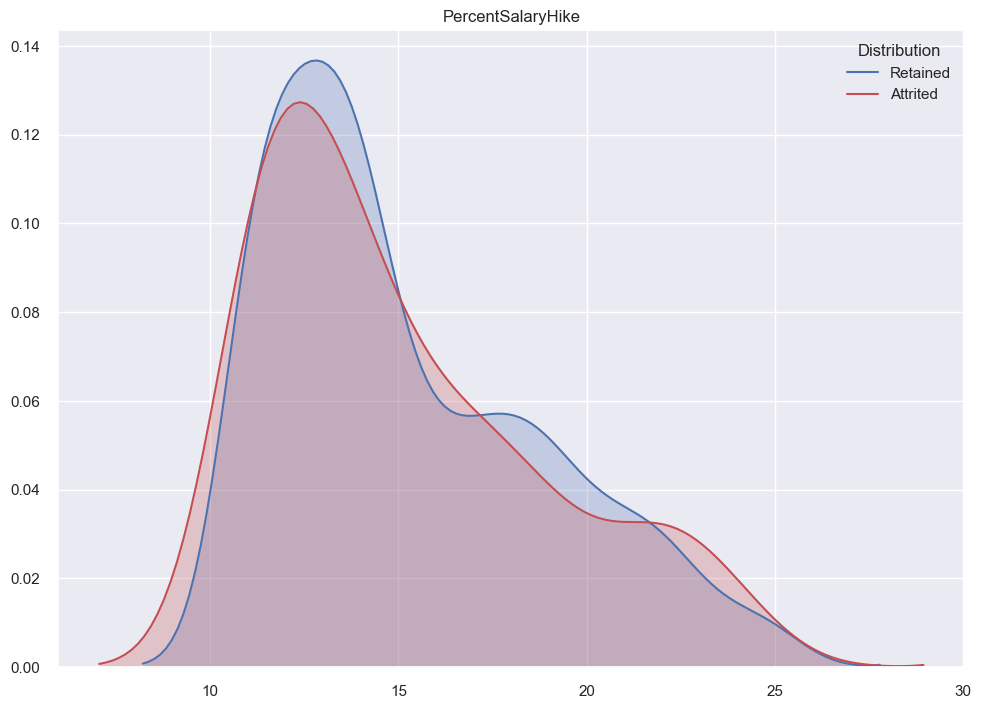

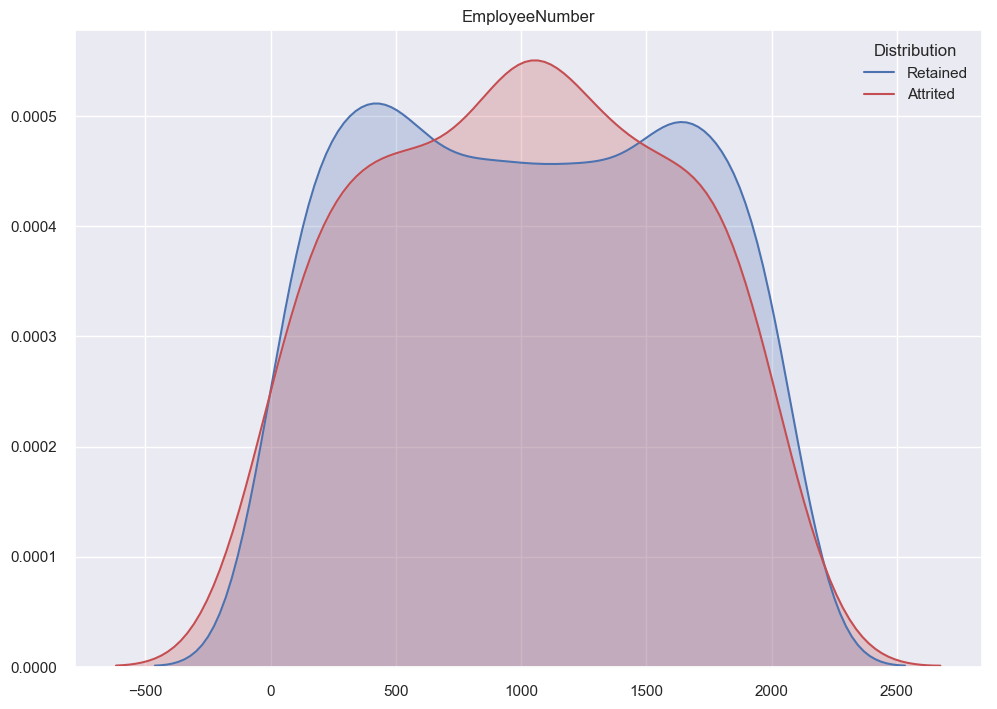

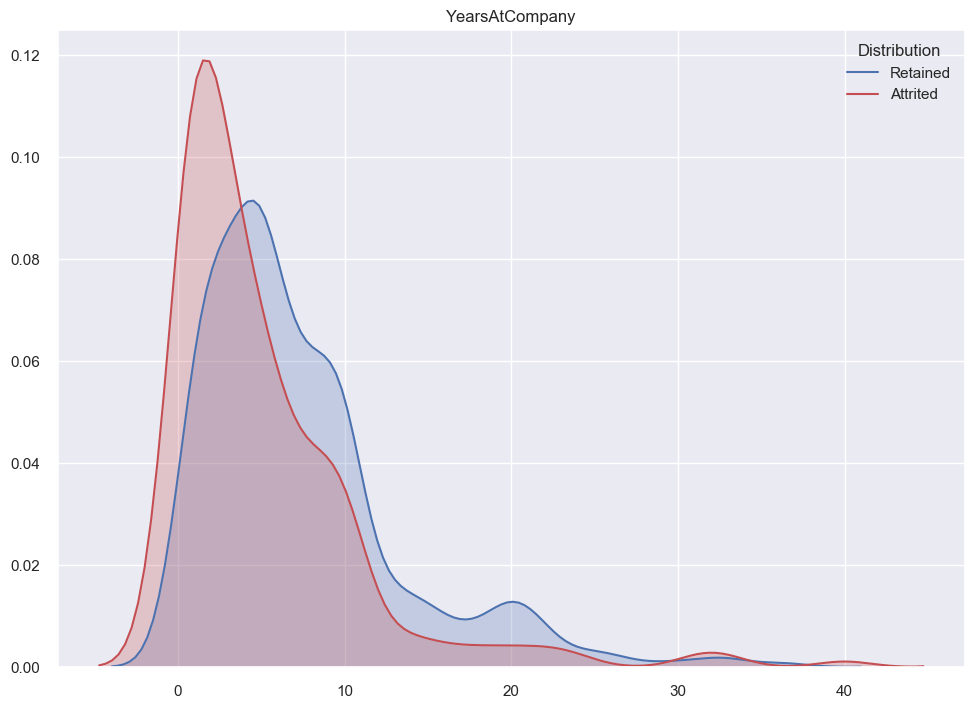

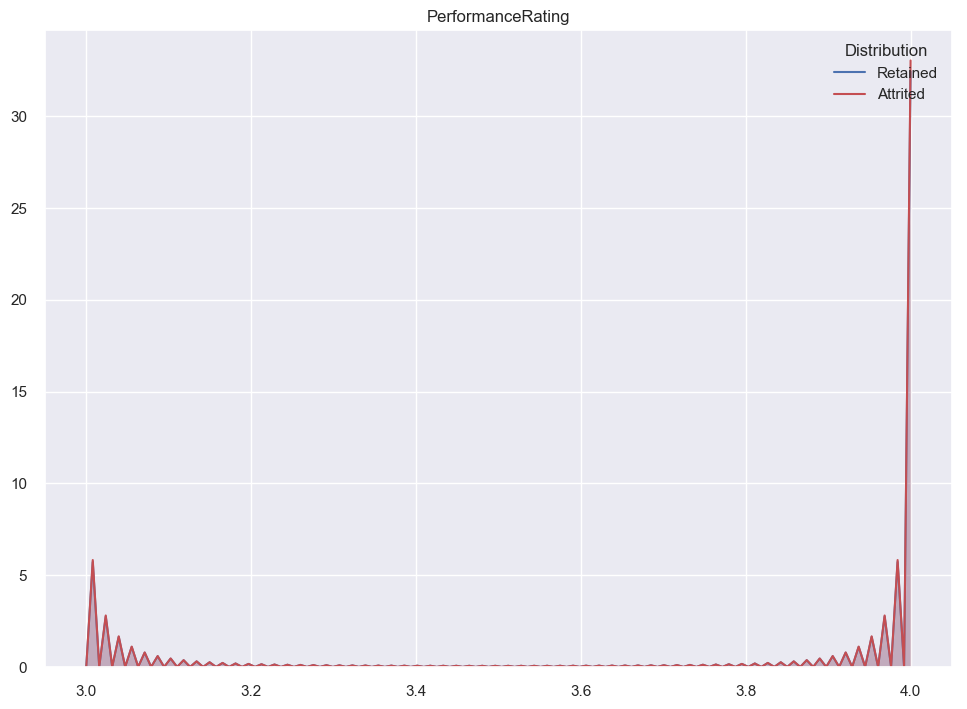

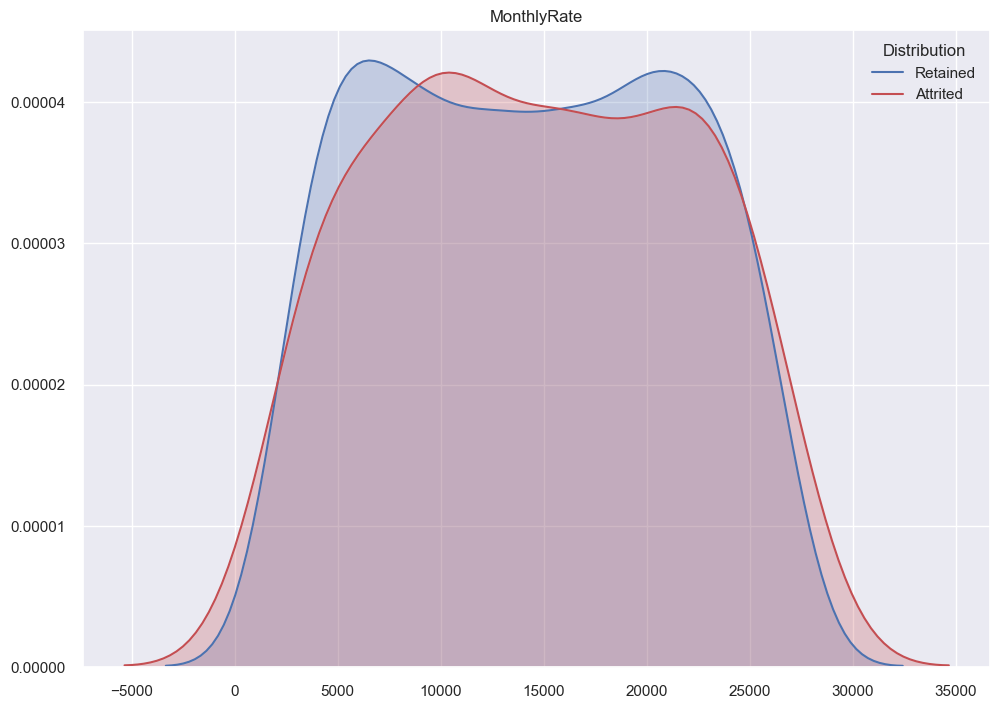

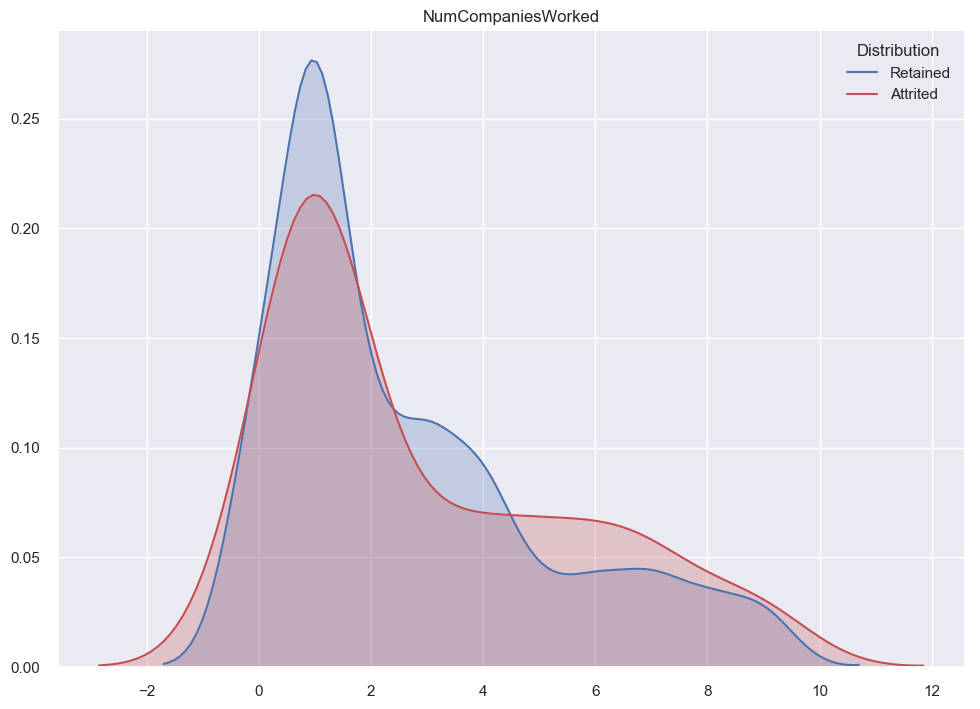

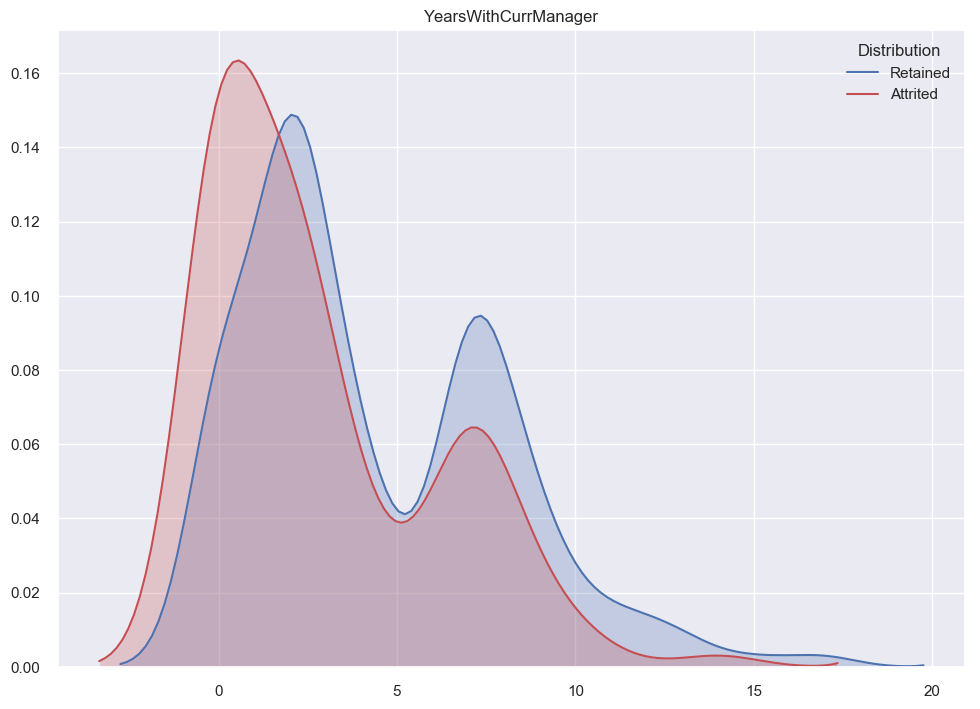

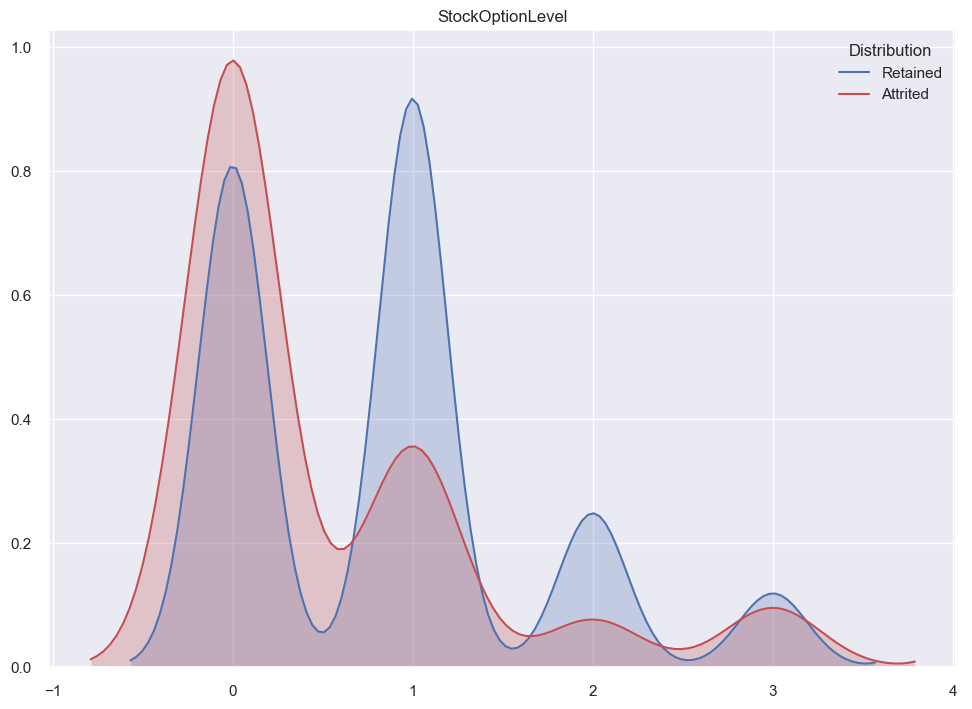

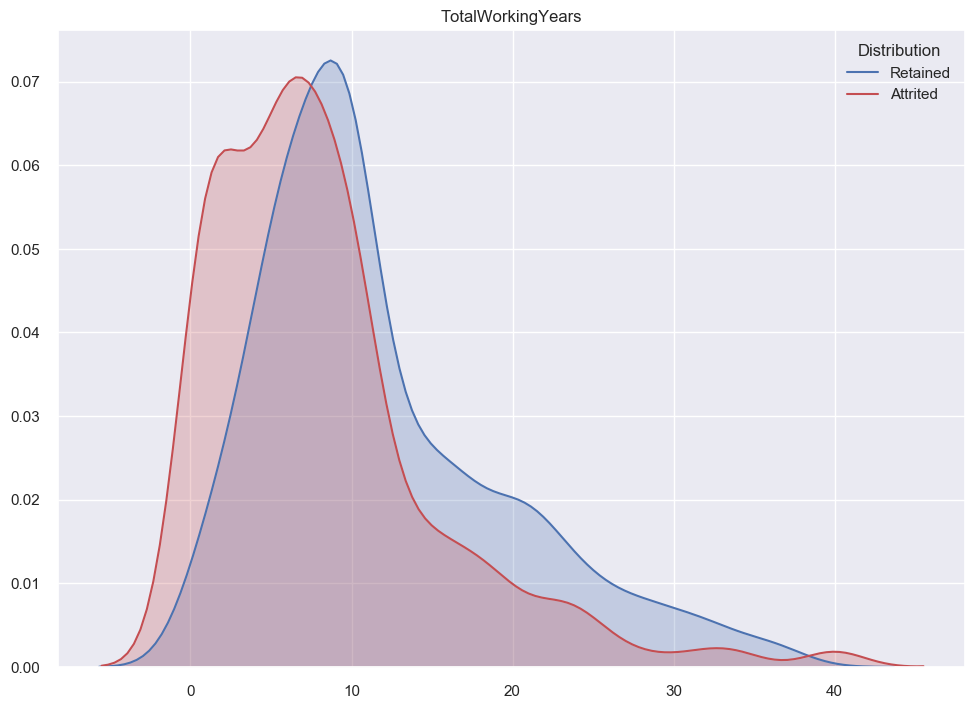

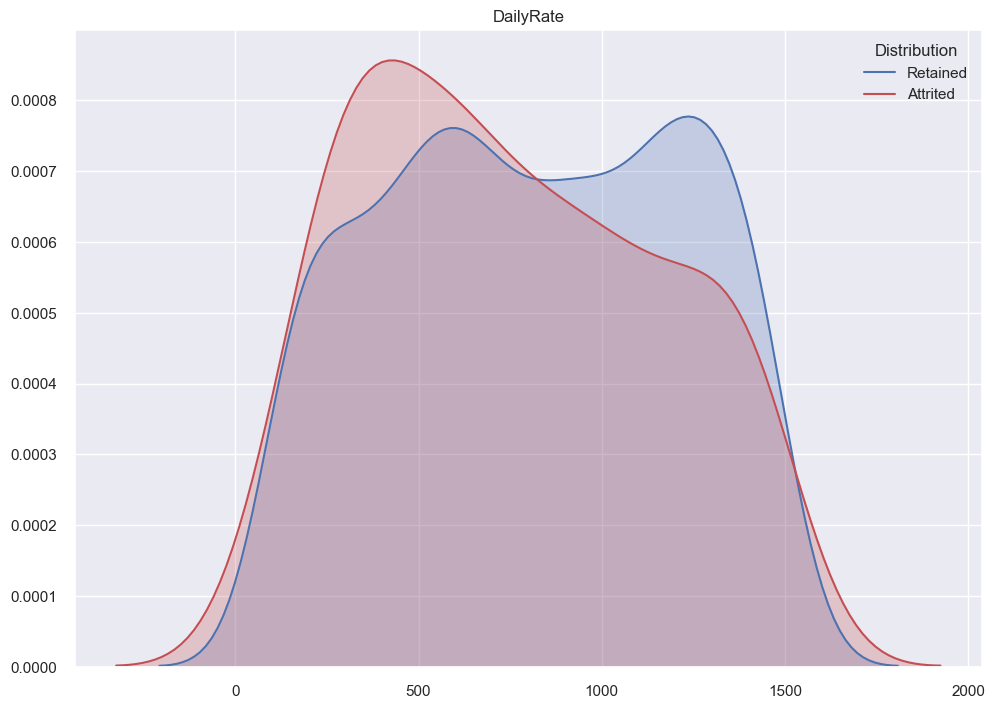

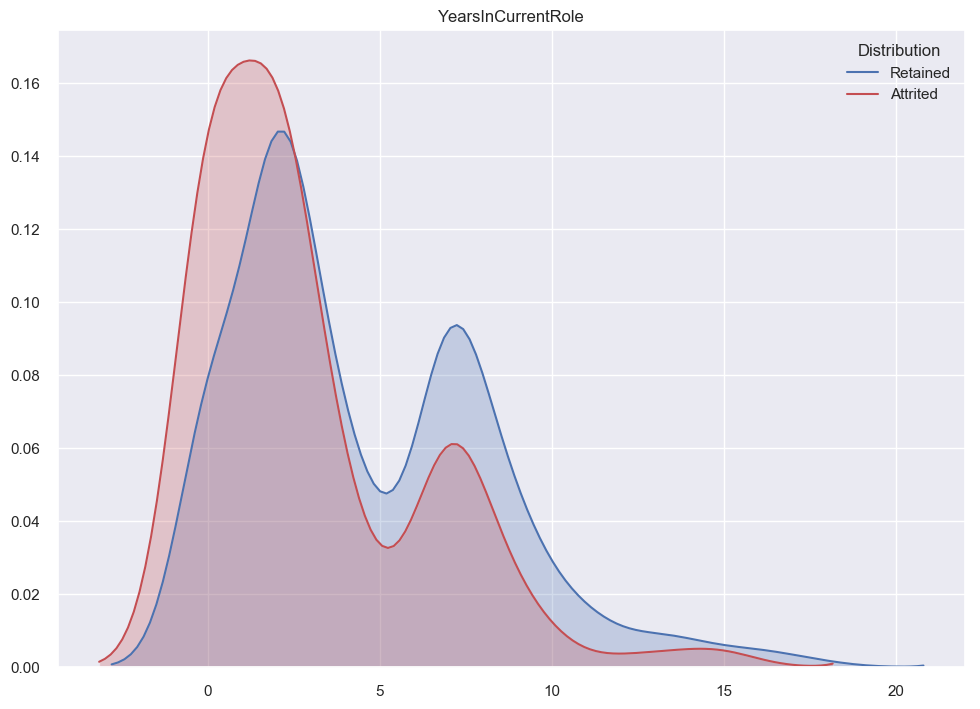

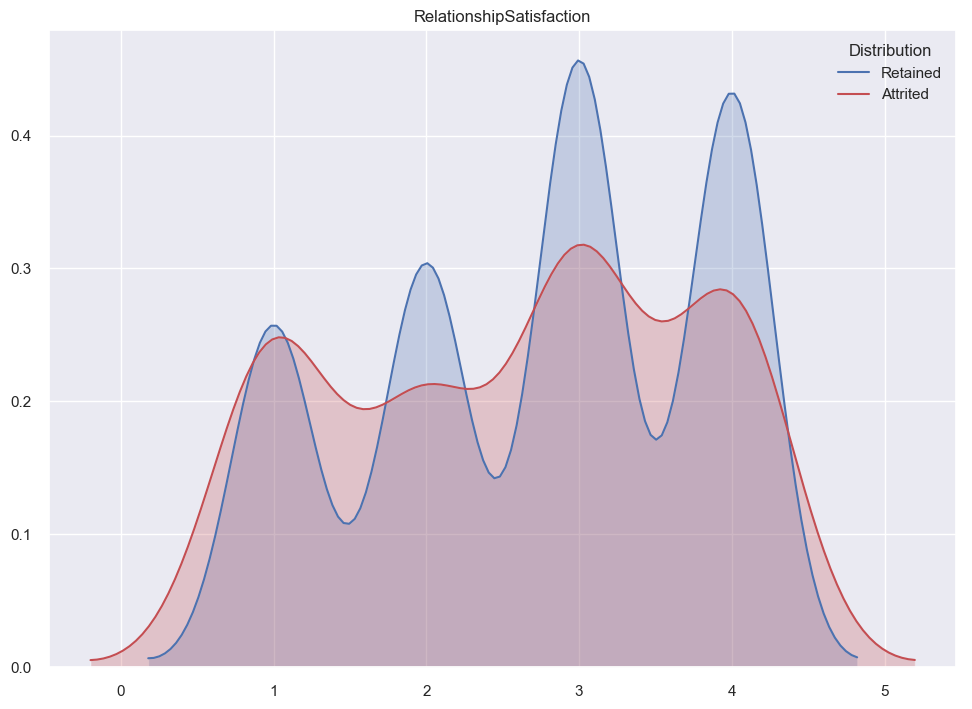

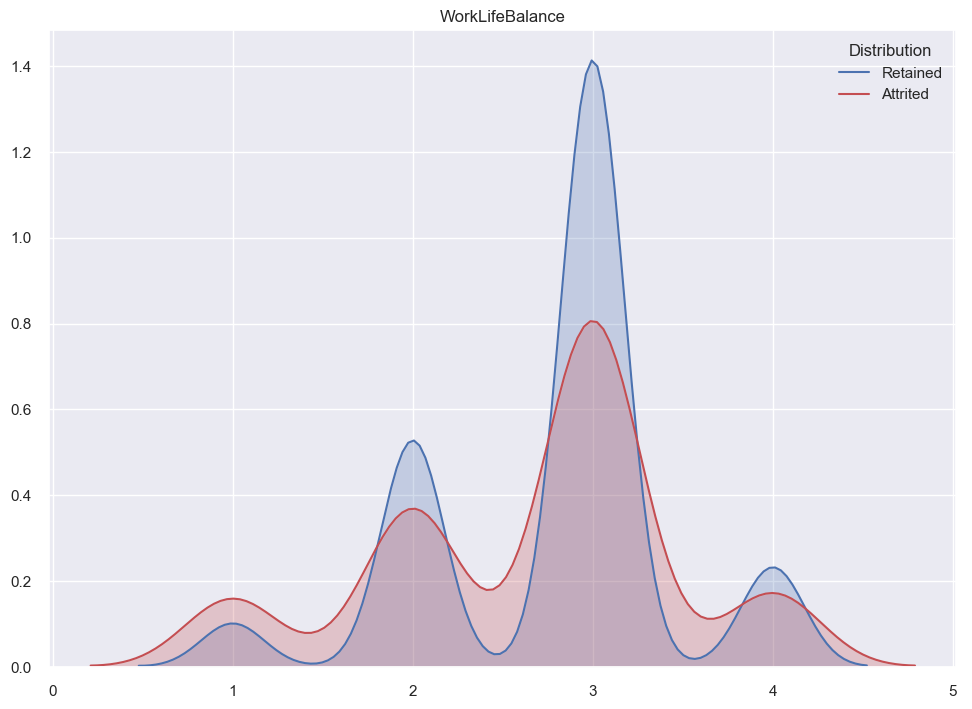

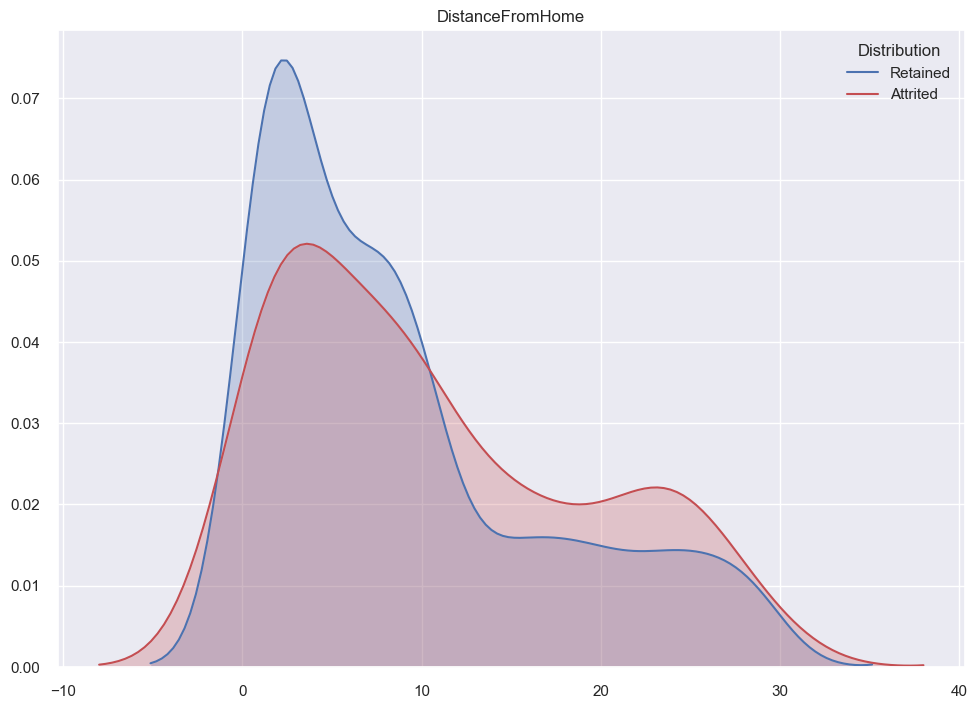

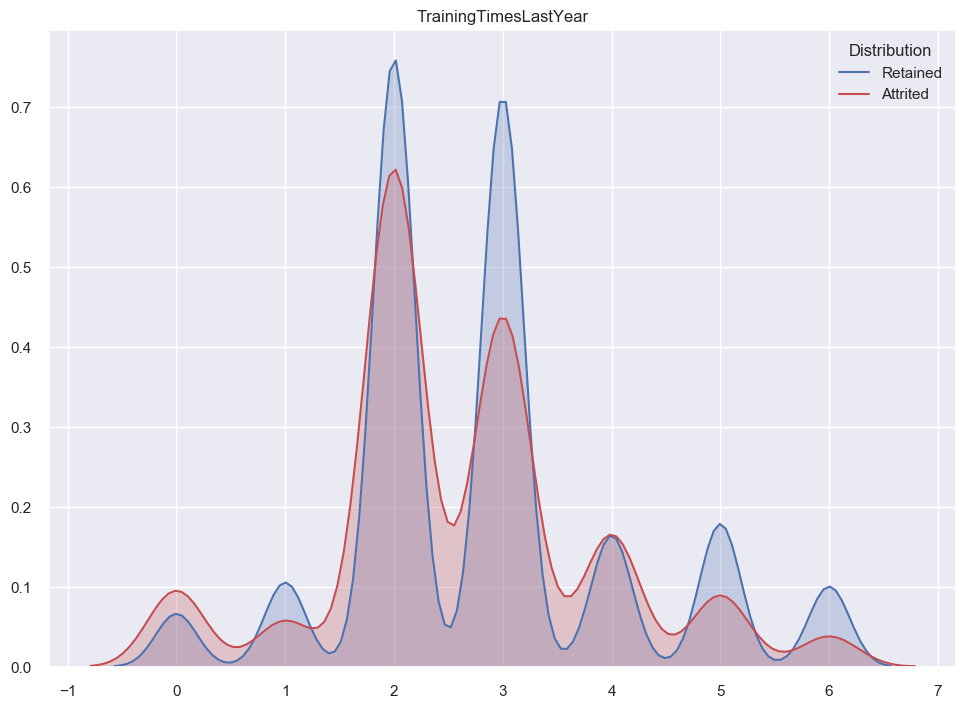

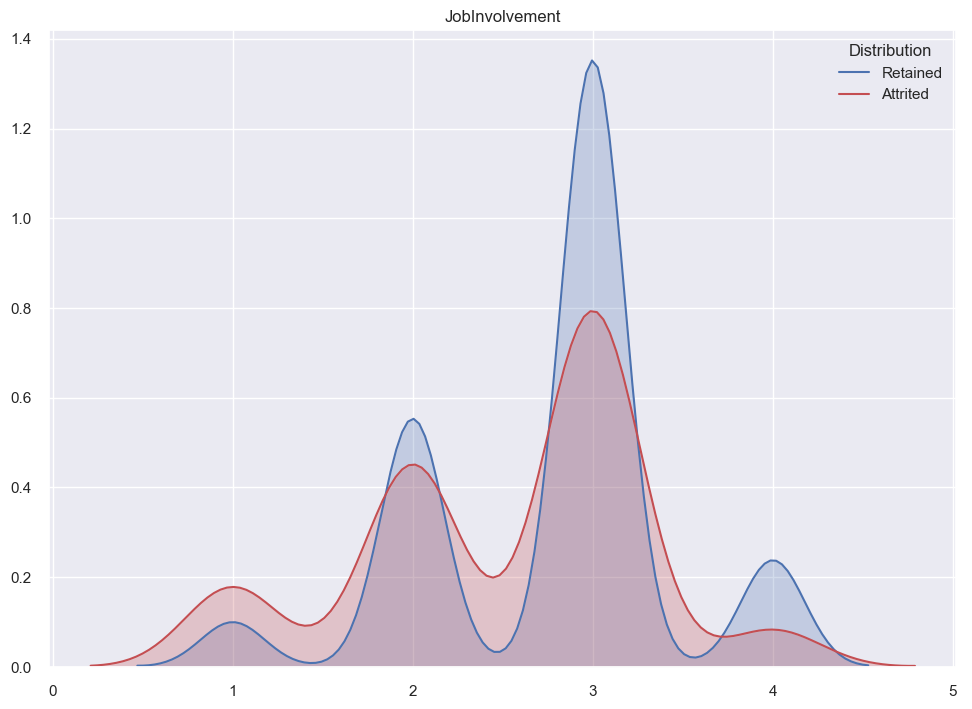

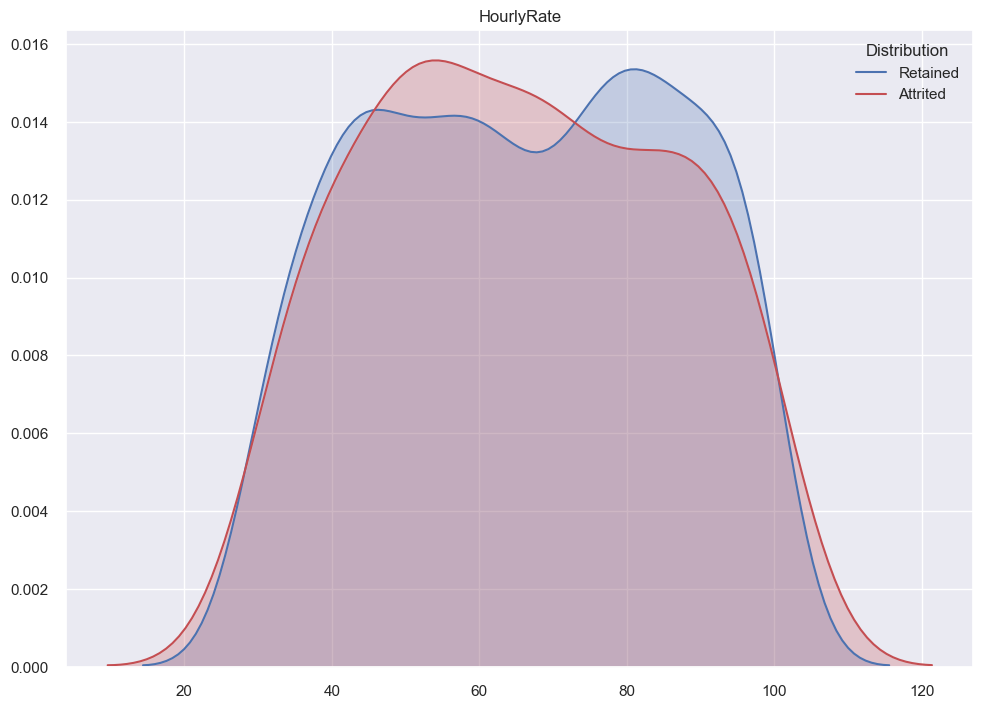

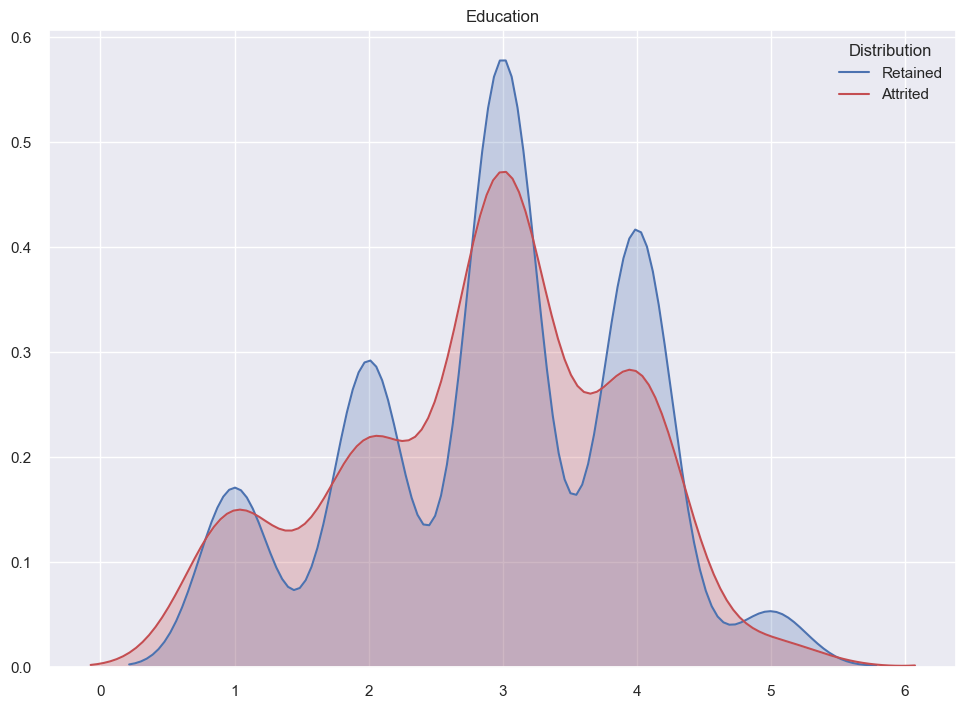

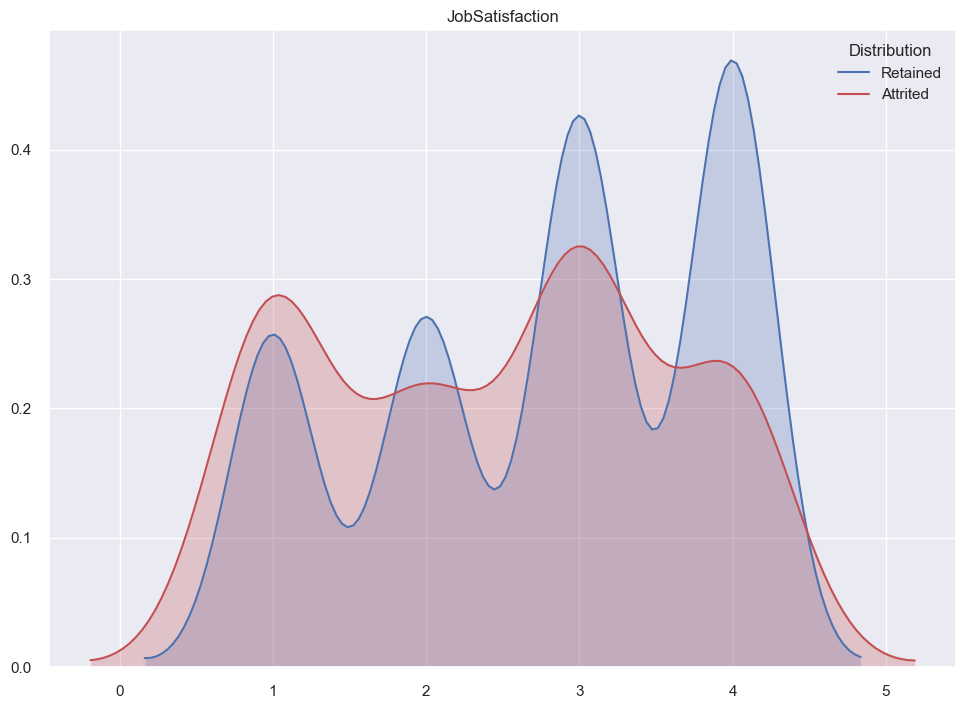

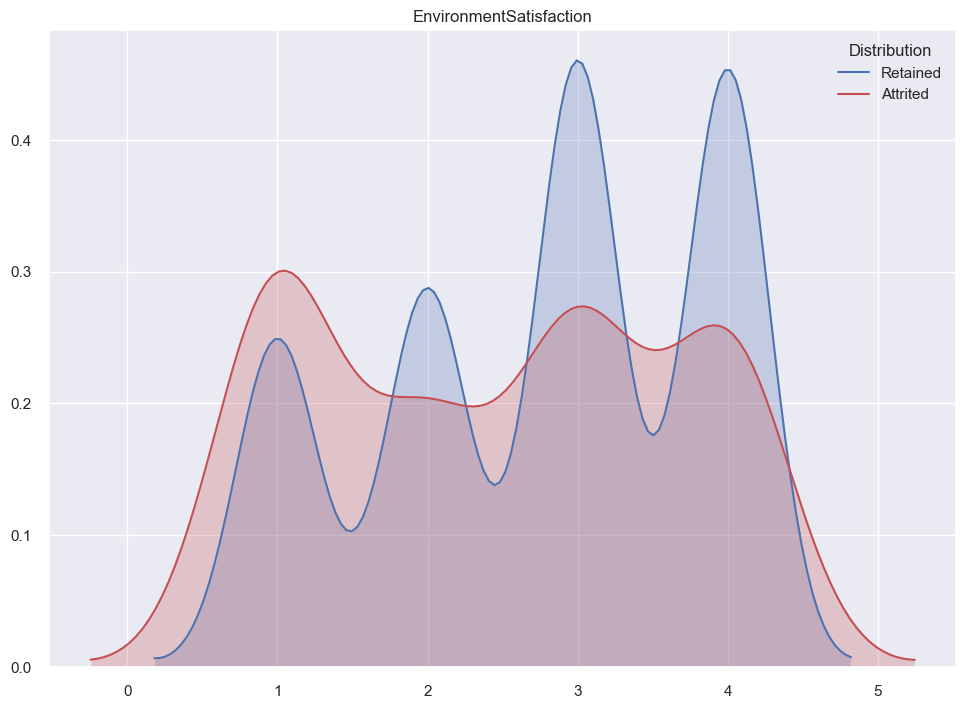

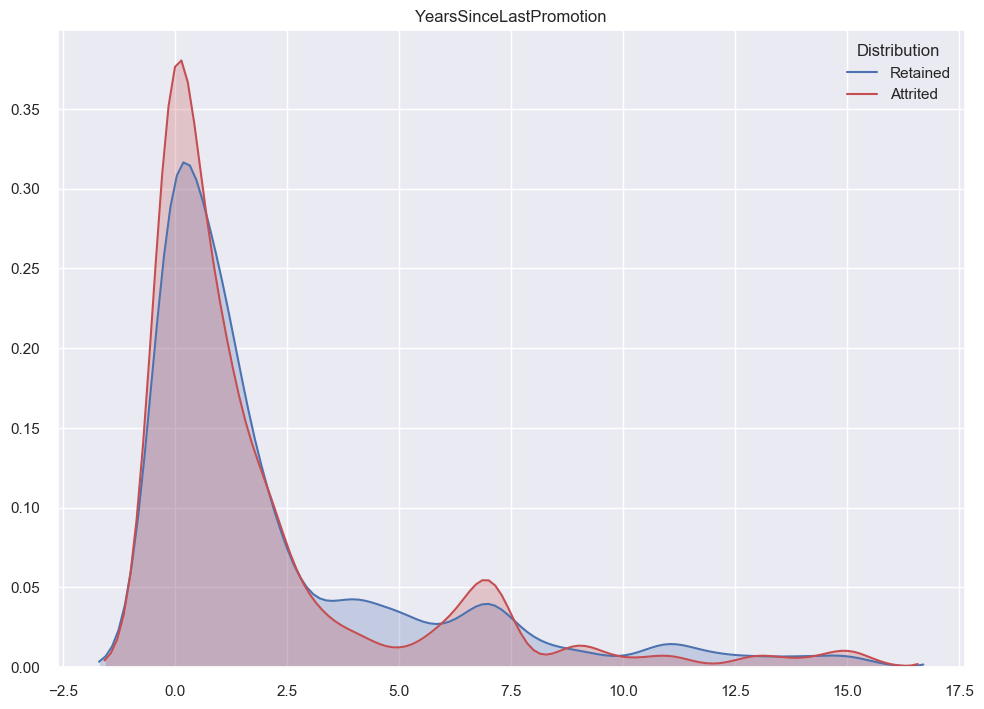

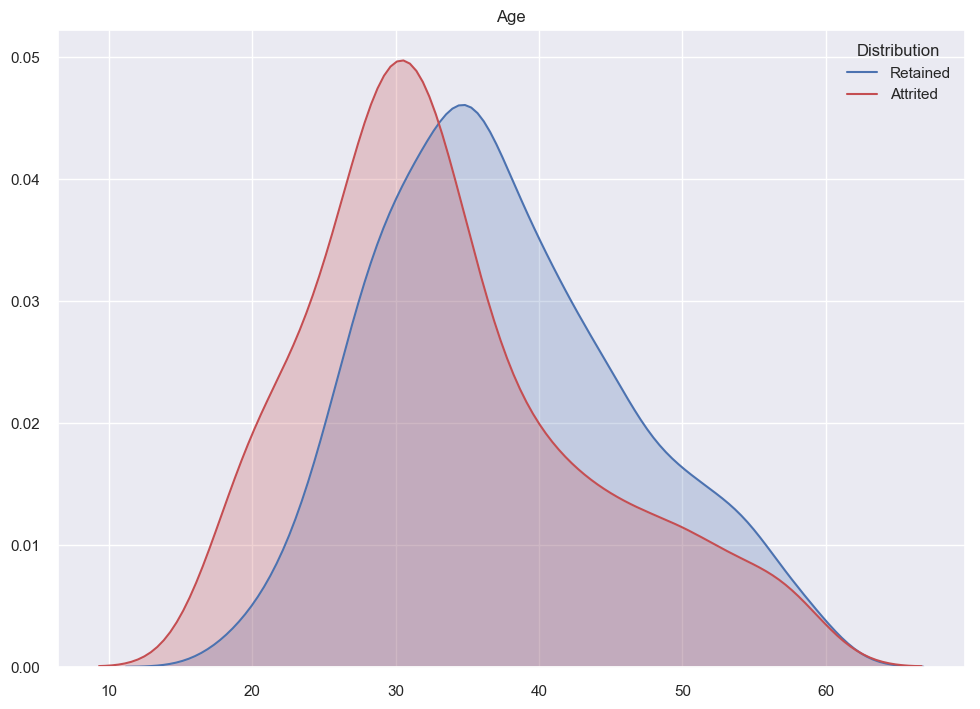

In [91]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#NOTE THIS WORKS if TARGET IS 0 OR 1
d0 = rawData[rawData["target"] == 0]
d1 = rawData[rawData["target"] == 1]

for col in num_cols:
    x0 = d0[col]
    x1 = d1[col]
    plt.figure()
    
    try:
        new_labels = ['Retained', 'Attrited']
        ax = sns.kdeplot(x0, shade=True, color="b", legend=True).set_title(col)
        
        ax = sns.kdeplot(x1, shade=True, color="r", legend=True)
        plt.legend(title='Distribution', loc='upper right', labels=new_labels)
    except Exception as e:
        print(e)
        print(col)
        pass